In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model

In [2]:
temp = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:,3].to_numpy()[:100]
temp.sort()

In [3]:
np.random.seed(43052)
eps = np.random.randn(100)*3 # 오차
icecream_sales = 20 + temp * 2.5 + eps 

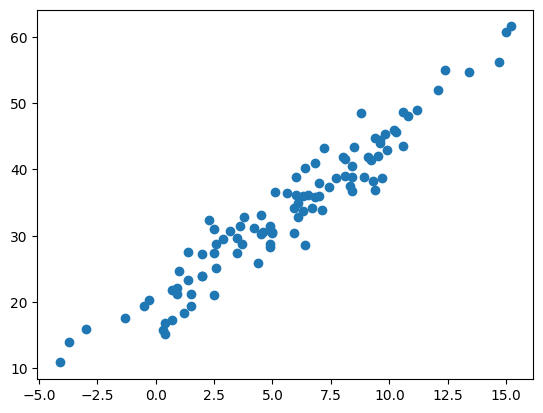

In [5]:
plt.plot(temp,icecream_sales,'o') # 20+ 2.5x 로 그냥 오차넣고 그냥 만들었음.

In [6]:
df_train = pd.DataFrame({'temp':temp,'sales':icecream_sales})
df_train

,temp,sales
0,-4.1,10.900261
1,-3.7,14.002524
2,-3.0,15.928335
3,-1.3,17.673681
4,-0.5,19.463362
...,...,...
95,12.4,54.926065
96,13.4,54.716129
97,14.7,56.194791
98,15.0,60.666163


# `-` 범주형 데이터가 껴있다면?

### - 범주형데이터가 있으면 linearRegression 시에 X 를 X.get_dummies 로 **원핫인코딩화**시켜서 이용하면 X 의 숨은 의미를 잘 이해할 수 있다.
### (참고로 X.get_dummies 를 이용하더라도 다른 코드는 변경할 필요없이 자동으로 sklearn 패키지내에서 잘 계산된다.)



# `-` 로지스틱모형이라면?

### - 우리가 필요한 것 : 0 과 1 구분이라면 linearRegression -> LogisticRegression 사용하면되고 위의 코드와 동일하게 사용하면된다.

### - 로지스틱은 딥러닝에서 자주 만나는 순전파와 역전파를 다루는데 간략하게 기봅ㄴ적으로 100번하여 0과 1을 구분시킨다곻란다. (-https://www.youtube.com/watch?v=m7oSyX4QCwY : 이해 유튜브영상)


-----

# `-` X 가 변수가 많을 때 Logistic 의 실패 가능성

### - Titanic 에서 Logistic 회귀시에 문제가 생긴다. 그 이유는 결측치가 많기 때문이다. 결측치를 제거해보자.


## `!` msno

In [11]:
import missingno as msno

In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/MP2023/main/posts/msno.csv")
df

,A,B,C,D,E
0,0.383420,1.385096,NaN,-0.545132,-0.732395
1,1.084175,0.080613,-0.770527,-0.272143,-0.749881
2,1.142778,1.258419,NaN,-0.072007,-0.440757
3,0.307894,0.521400,0.446974,0.329530,-1.457388
4,0.237787,0.132401,-0.516630,0.177995,0.416182
...,...,...,...,...,...
995,0.041092,-1.308165,1.085820,1.136210,NaN
996,-1.286358,1.547987,NaN,-0.174334,-0.579486
997,0.710257,1.764058,NaN,-0.353928,NaN
998,-1.908729,-0.804691,NaN,NaN,-0.066739


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       668 non-null    float64
 1   B       656 non-null    float64
 2   C       608 non-null    float64
 3   D       668 non-null    float64
 4   E       660 non-null    float64
dtypes: float64(5)
memory usage: 39.2 KB


<AxesSubplot: >

<Figure size 200x100 with 0 Axes>

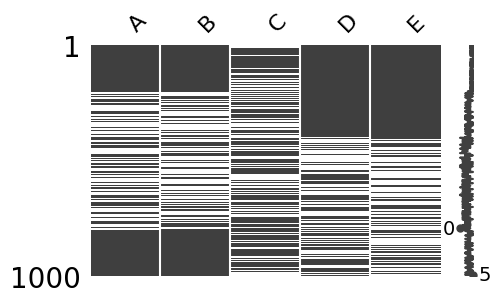

In [24]:
plt.figure(figsize=(2,1))
#msno.matrix(df) # 결측치보기 가장 편함 흰색있으면 겨륵치다.
msno.matrix(df, figsize=(5, 3))

<AxesSubplot: >

<Figure size 500x300 with 0 Axes>

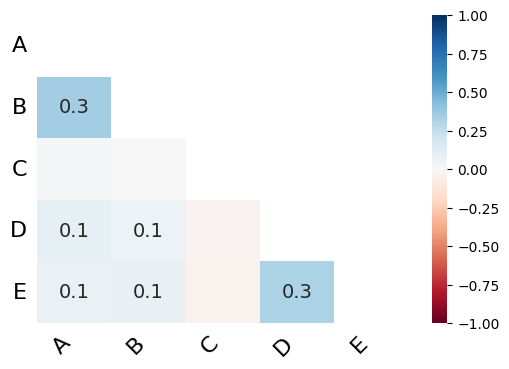

In [26]:
plt.figure(figsize=(5,3))
msno.heatmap(df,figsize=(6,4))

<AxesSubplot: >

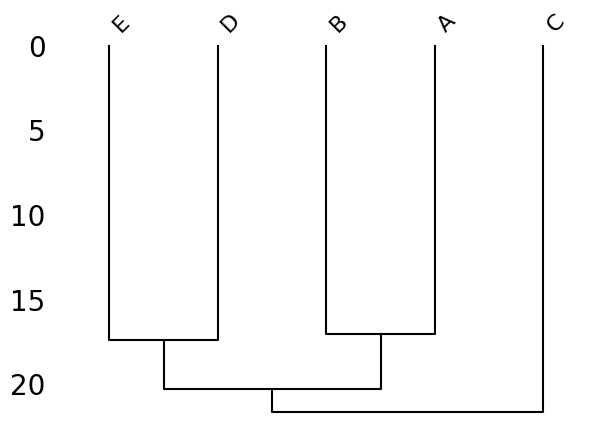

In [27]:
msno.dendrogram(df,figsize=(7,5))

In [28]:
import numpy as np
import pandas as pd 
import sklearn.impute

In [31]:
df = pd.DataFrame({'A':[2.1,1.9,2.2,np.nan,1.9], 'B':[0,0,np.nan,0,0]})
df

,A,B
0,2.1,0.0
1,1.9,0.0
2,2.2,NaN
3,NaN,0.0
4,1.9,0.0


In [32]:
imputer = sklearn.impute.SimpleImputer()
imputer.fit(df)
imputer.transform(df)

array([[2.1  , 0.   ],
       [1.9  , 0.   ],
       [2.2  , 0.   ],
       [2.025, 0.   ],
       [1.9  , 0.   ]])

In [33]:
imputer = sklearn.impute.SimpleImputer()
imputer.fit_transform(df)

array([[2.1  , 0.   ],
       [1.9  , 0.   ],
       [2.2  , 0.   ],
       [2.025, 0.   ],
       [1.9  , 0.   ]])

In [34]:
imputer = sklearn.impute.SimpleImputer(strategy='mean')
imputer.fit_transform(df)

array([[2.1  , 0.   ],
       [1.9  , 0.   ],
       [2.2  , 0.   ],
       [2.025, 0.   ],
       [1.9  , 0.   ]])

In [35]:
imputer = sklearn.impute.SimpleImputer(strategy='most_frequent')
imputer.fit_transform(df)

array([[2.1, 0. ],
       [1.9, 0. ],
       [2.2, 0. ],
       [1.9, 0. ],
       [1.9, 0. ]])

In [36]:
imputer = sklearn.impute.SimpleImputer(strategy='constant',fill_value=-999)
imputer.fit_transform(df)

array([[   2.1,    0. ],
       [   1.9,    0. ],
       [   2.2, -999. ],
       [-999. ,    0. ],
       [   1.9,    0. ]])

# `-` 결측치 없애기 일반화

In [38]:
def impute_missing(df):
    df_imputed = df.copy()
    df_num = df.select_dtypes(include="number")
    df_cat = df.select_dtypes(exclude="number")
    df_imputed[df_num.columns] = sklearn.impute.SimpleImputer().fit_transform(df_num) 
    df_imputed[df_cat.columns] = sklearn.impute.SimpleImputer(strategy='most_frequent').fit_transform(df_cat) 
    return df_imputed

In [39]:
# impute_missing(df_test) 이렇게쓰면된다.